# Factors influencing when people cycle

## Prepare workstation and import files

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data files
central_london = pd.read_csv("Central London.csv")
inner_london = pd.read_csv("Inner London.csv")
outer_london = pd.read_csv("Outer London.csv")

C:\Users\mhbil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\mhbil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Explore and clean raw data

### Central London

In [3]:
# Print shape
print(central_london.shape)

(1048366, 17)


In [4]:
# Examine columns
print(central_london.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048366 entries, 0 to 1048365
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Survey wave (calendar quarter)  758163 non-null  object 
 1   Equivalent financial quarter    758163 non-null  object 
 2   Site ID                         758163 non-null  object 
 3   Location                        758163 non-null  object 
 4   Survey date                     748007 non-null  object 
 5   Weather                         746329 non-null  object 
 6   Time                            758163 non-null  object 
 7   Period                          758163 non-null  object 
 8   Direction                       758163 non-null  object 
 9   Start hour                      758163 non-null  float64
 10  Start minute                    758163 non-null  float64
 11  Number of private cycles        758099 non-null  float64
 12  Number of cycl

In [5]:
# Check for missing values
print(central_london.isnull().sum())

Survey wave (calendar quarter)     290203
Equivalent financial quarter       290203
Site ID                            290203
Location                           290203
Survey date                        300359
Weather                            302037
Time                               290203
Period                             290203
Direction                          290203
Start hour                         290203
Start minute                       290203
Number of private cycles           290267
Number of cycle hire bikes         290267
Total cycles                       290203
Unnamed: 14                       1048366
Unnamed: 15                       1048366
Unnamed: 16                       1048366
dtype: int64


In [6]:
# Print values for Survey wave (calendar quarter)
central_london['Survey wave (calendar quarter)'].value_counts()

2020 Q3 (July-September)       26880
2020 Q1 (January-March)        26880
2019 Q2 (April-June)           26880
2019 Q1 (January-March)        26880
2018 Q4 (October-December)     26880
2018 Q3 (July-September)       26880
2018 Q2 (April-June)           26880
2017 Q4 (October-December)     26752
2017 Q3 (July-September)       26752
2019 Q4 (October-December)     26752
2019 Q3 (July-September)       26752
2021 Q4 (October-December)     26624
2021 Q3 (July-September)       26584
2017 Q1 (January-March)        25728
2015 Q4 (October-December)     25728
2014 Q3 (July-September)       25728
2014 Q4 (October-December)     25728
2015 Q1 (January-March)        25728
2015 Q2 (April-June)           25728
2017 Q2 (April-June)           25728
2015 Q3 (July-September)       25728
2016 Q2 (April-June)           25728
2018 Q1 (January-March)        25728
2014 Q2 (April-June)           25728
2016 Q4 (October-December)     25728
2016 Q1 (January-March)        25600
2016 Q3 (July-September)       25600
2

In [7]:
# Drop unnamed columns from data frame
central_london_clean = central_london.drop(['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], axis=1)
print(central_london_clean.head())

  Survey wave (calendar quarter) Equivalent financial quarter   Site ID  \
0        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
1        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
2        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
3        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
4        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   

                             Location    Survey date Weather         Time  \
0  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0600 - 0615   
1  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0615 - 0630   
2  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0630 - 0645   
3  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0645 - 0700   
4  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0700 - 0715   

                        Period   Direction  Start hour  Start minute  \
0  Early Morni

In [8]:
# Create Month column
central_london_clean['Month'] = central_london_clean['Survey date'].str.split('/').str[1]

In [9]:
# Check values of new Month column
print(central_london_clean['Month'].shape)
print(central_london_clean['Month'].value_counts())
print(central_london_clean['Month'].isnull().sum())

(1048366,)
11    77101
09    76192
01    71934
08    69512
06    67257
07    60838
03    58606
05    56326
12    55862
02    51936
04    51132
10    51055
Name: Month, dtype: int64
300615


In [10]:
# Examine what Survey date looks like when Month is missing but Survey date is not
sub_df = central_london_clean[central_london_clean['Month'].isnull() & ~ central_london_clean['Survey date'].isnull()]
print(sub_df['Survey date'])

654784     
654785     
654786     
654787     
654788     
         ..
664251     
664252     
664253     
664254     
664255     
Name: Survey date, Length: 256, dtype: object


Observations: There are 256 survey date variables that are formatted incorrectly, thus resulting in 256 missing Month values. Given the large size of the data set, these values will be ignored rather than fixing them.

In [11]:
# Create Year column
central_london_clean['Year'] = central_london_clean['Survey date'].str.split('/').str[2]

In [12]:
# Check values of new Year column
print(central_london_clean['Year'].shape)
print(central_london_clean['Year'].value_counts())
print(central_london_clean['Year'].isnull().sum())

(1048366,)
19    106880
18    105300
14    102540
17    102444
16    101632
15    100916
21     77651
20     50388
Name: Year, dtype: int64
300615


In [13]:
# Create quarter column
central_london_clean['Quarter'] = central_london_clean['Survey wave (calendar quarter)'].str.split(" ").str[1]

In [14]:
# Check values of new Quarter column
print(central_london_clean['Quarter'].shape)
print(central_london_clean['Quarter'].value_counts())
print(central_london_clean['Quarter'].isnull().sum())

(1048366,)
Q3    211032
Q4    184192
Q1    181952
Q2    180987
Name: Quarter, dtype: int64
290203


In [15]:
# Check dtype of new variables
central_london_clean.dtypes

Survey wave (calendar quarter)     object
Equivalent financial quarter       object
Site ID                            object
Location                           object
Survey date                        object
Weather                            object
Time                               object
Period                             object
Direction                          object
Start hour                        float64
Start minute                      float64
Number of private cycles          float64
Number of cycle hire bikes        float64
Total cycles                      float64
Month                              object
Year                               object
Quarter                            object
dtype: object

In [16]:
# Change Month and Year to float
central_london_clean['Month'] = central_london_clean['Month'].astype(float)
central_london_clean['Year'] = central_london_clean['Year'].astype(float)
print(central_london_clean.dtypes)

Survey wave (calendar quarter)     object
Equivalent financial quarter       object
Site ID                            object
Location                           object
Survey date                        object
Weather                            object
Time                               object
Period                             object
Direction                          object
Start hour                        float64
Start minute                      float64
Number of private cycles          float64
Number of cycle hire bikes        float64
Total cycles                      float64
Month                             float64
Year                              float64
Quarter                            object
dtype: object


In [95]:
# Create Region column
central_london_clean['Region'] = "Central London"

In [96]:
# Check values of new Region column
central_london_clean['Region'].value_counts()

Central London    1048366
Name: Region, dtype: int64

### Outer London

In [17]:
# Print shape
print(outer_london.shape)

(375660, 14)


In [18]:
# Examine first few rows of data
print(outer_london.head())

   Survey wave (year)   Site ID          Location    Survey date Weather  \
0                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
1                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
2                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
3                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
4                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   

          Time                       Period   Direction  Start hour  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound           6   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound           6   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound           6   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound           6   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound           7   

   Start minute  Number of male cycles  Number of female cycles  \
0             0                      2           

In [19]:
# Examine columns
print(outer_london.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375660 entries, 0 to 375659
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Survey wave (year)        375660 non-null  int64 
 1   Site ID                   375660 non-null  object
 2   Location                  375660 non-null  object
 3   Survey date               374492 non-null  object
 4   Weather                   374692 non-null  object
 5   Time                      375660 non-null  object
 6   Period                    375660 non-null  object
 7   Direction                 375660 non-null  object
 8   Start hour                375660 non-null  int64 
 9   Start minute              375660 non-null  int64 
 10  Number of male cycles     375660 non-null  int64 
 11  Number of female cycles   375660 non-null  int64 
 12  Number of unknown cycles  375660 non-null  int64 
 13  Total cycles              375660 non-null  int64 
dtypes: i

In [20]:
# Check for missing values
print(outer_london.isnull().sum())

Survey wave (year)             0
Site ID                        0
Location                       0
Survey date                 1168
Weather                      968
Time                           0
Period                         0
Direction                      0
Start hour                     0
Start minute                   0
Number of male cycles          0
Number of female cycles        0
Number of unknown cycles       0
Total cycles                   0
dtype: int64


In [21]:
# Create Month column
outer_london['Month'] = outer_london['Survey date'].str.split('/').str[1]

In [22]:
# Check values of new Month column
print(outer_london['Month'].shape)
print(outer_london['Month'].value_counts())
print(outer_london['Month'].isnull().sum())

(375660,)
06    125316
05    116664
04     54884
07     46768
10     16992
09     13580
08       160
11       128
Name: Month, dtype: int64
1168


In [23]:
# Create Year column
outer_london['Year'] = outer_london['Survey date'].str.split('/').str[2]

In [24]:
# Check values of new Year column
print(outer_london['Year'].shape)
print(outer_london['Year'].value_counts())
print(outer_london['Year'].isnull().sum())

(375660,)
18    57728
19    57584
21    57472
15    57344
16    57344
17    57344
20    29676
Name: Year, dtype: int64
1168


In [25]:
# Check dtypes
outer_london.dtypes

Survey wave (year)           int64
Site ID                     object
Location                    object
Survey date                 object
Weather                     object
Time                        object
Period                      object
Direction                   object
Start hour                   int64
Start minute                 int64
Number of male cycles        int64
Number of female cycles      int64
Number of unknown cycles     int64
Total cycles                 int64
Month                       object
Year                        object
dtype: object

In [26]:
# Change Month and Year to float
outer_london['Month'] = outer_london['Month'].astype(float)
outer_london['Year'] = outer_london['Year'].astype(float)
print(outer_london.dtypes)

Survey wave (year)            int64
Site ID                      object
Location                     object
Survey date                  object
Weather                      object
Time                         object
Period                       object
Direction                    object
Start hour                    int64
Start minute                  int64
Number of male cycles         int64
Number of female cycles       int64
Number of unknown cycles      int64
Total cycles                  int64
Month                       float64
Year                        float64
dtype: object


In [27]:
# Create a Quarter column

# Create list of conditions
conditions = [
    (outer_london['Month'] > 2) & (outer_london['Month'] <= 3),
    (outer_london['Month'] > 5) & (outer_london['Month'] <= 6),
    (outer_london['Month'] > 8) & (outer_london['Month'] <= 9),
    (outer_london['Month'] > 11) & (outer_london['Month'] <= 12)
]

# Create a list of values to assign for each condition
values = ['Q1', 'Q2', 'Q3', 'Q4']

# Create new 'Seasons' column and use np.select to assign values to it
outer_london['Quarter'] = np.select(conditions, values)

# Display updated DataFrame
print(outer_london.Quarter.value_counts())
print(outer_london.head())
print(outer_london.tail())

0     236764
Q2    125316
Q3     13580
Name: Quarter, dtype: int64
   Survey wave (year)   Site ID          Location    Survey date Weather  \
0                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
1                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
2                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
3                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
4                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   

          Time                       Period   Direction  Start hour  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound           6   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound           6   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound           6   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound           6   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound           7   

   Start minute  Number of male cycles  Number of

In [97]:
# Create Region column
outer_london['Region'] = "Outer London"

In [98]:
# Check Region column
outer_london['Region'].value_counts()

Outer London    375660
Name: Region, dtype: int64

### Inner London

In [28]:
# Print shape
print(inner_london.shape)

(615168, 13)


In [29]:
# Examine first few rows of data
print(inner_london.head())

   Survey wave (year)   Site ID    Location    Survey date Weather  \
0              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   
1              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   
2              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   
3              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   
4              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   

          Time                       Period   Direction  Start hour  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound         6.0   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound         6.0   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound         6.0   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound         6.0   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound         7.0   

   Start minute  Number of private cycles  Number of cycle hire bikes  \
0           0.0                       1.0                         0.0   
1     

In [30]:
# Examine columns
print(inner_london.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615168 entries, 0 to 615167
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Survey wave (year)          523776 non-null  float64
 1   Site ID                     523776 non-null  object 
 2   Location                    523776 non-null  object 
 3   Survey date                 521024 non-null  object 
 4   Weather                     519102 non-null  object 
 5   Time                        523770 non-null  object 
 6   Period                      523770 non-null  object 
 7   Direction                   523776 non-null  object 
 8   Start hour                  523770 non-null  float64
 9   Start minute                523770 non-null  float64
 10  Number of private cycles    523776 non-null  float64
 11  Number of cycle hire bikes  523776 non-null  float64
 12  Total cycles                523776 non-null  float64
dtypes: float64(6),

In [31]:
# Check for missing values
print(inner_london.isnull().sum())

Survey wave (year)            91392
Site ID                       91392
Location                      91392
Survey date                   94144
Weather                       96066
Time                          91398
Period                        91398
Direction                     91392
Start hour                    91398
Start minute                  91398
Number of private cycles      91392
Number of cycle hire bikes    91392
Total cycles                  91392
dtype: int64


In [32]:
# Create Month column
inner_london['Month'] = inner_london['Survey date'].str.split('/').str[1]

In [33]:
# Check values of new Month column
print(inner_london['Month'].shape)
print(inner_london['Month'].value_counts())
print(inner_london['Month'].isnull().sum())

(615168,)
06    149524
05    149140
07     89840
04     81278
09     26338
10     23902
11       704
08       208
03        90
Name: Month, dtype: int64
94144


In [34]:
# Create Year column
inner_london['Year'] = inner_london['Survey date'].str.split('/').str[2]

In [35]:
# Check values of new Year column
print(inner_london['Year'].shape)
print(inner_london['Year'].value_counts())
print(inner_london['Year'].isnull().sum())

(615168,)
21    91392
15    76032
16    76032
18    76032
19    75968
17    75264
20    50304
Name: Year, dtype: int64
94144


In [36]:
# Check dtypes
inner_london.dtypes

Survey wave (year)            float64
Site ID                        object
Location                       object
Survey date                    object
Weather                        object
Time                           object
Period                         object
Direction                      object
Start hour                    float64
Start minute                  float64
Number of private cycles      float64
Number of cycle hire bikes    float64
Total cycles                  float64
Month                          object
Year                           object
dtype: object

In [37]:
# Change Month and Year to float
inner_london['Month'] = inner_london['Month'].astype(float)
inner_london['Year'] = inner_london['Year'].astype(float)
print(inner_london.dtypes)

Survey wave (year)            float64
Site ID                        object
Location                       object
Survey date                    object
Weather                        object
Time                           object
Period                         object
Direction                      object
Start hour                    float64
Start minute                  float64
Number of private cycles      float64
Number of cycle hire bikes    float64
Total cycles                  float64
Month                         float64
Year                          float64
dtype: object


In [38]:
# Create a Quarter column

# Create list of conditions
conditions = [
    (inner_london['Month'] > 2) & (inner_london['Month'] <= 3),
    (inner_london['Month'] > 5) & (inner_london['Month'] <= 6),
    (inner_london['Month'] > 8) & (inner_london['Month'] <= 9),
    (inner_london['Month'] > 11) & (inner_london['Month'] <= 12)
]

# Create a list of values to assign for each condition
values = ['Q1', 'Q2', 'Q3', 'Q4']

# Create new 'Seasons' column and use np.select to assign values to it
inner_london['Quarter'] = np.select(conditions, values)

# Display updated DataFrame
print(inner_london.Quarter.value_counts())
print(inner_london.head())
print(inner_london.tail())

0     439216
Q2    149524
Q3     26338
Q1        90
Name: Quarter, dtype: int64
   Survey wave (year)   Site ID    Location    Survey date Weather  \
0              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   
1              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   
2              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   
3              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   
4              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   

          Time                       Period   Direction  Start hour  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound         6.0   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound         6.0   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound         6.0   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound         6.0   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound         7.0   

   Start minute  Number of private cycles  Number of cycle hire bikes  \

In [99]:
# Create Region column
inner_london['Region'] = "Inner London"

In [100]:
# Check Region column
inner_london['Region'].value_counts()

Inner London    615168
Name: Region, dtype: int64

### Concatenate data

In [101]:
# Concatenate data and reset index
london_all = pd.concat([central_london_clean, inner_london, outer_london], ignore_index=True)

In [102]:
# Examine shape of new data
print(london_all.shape)

(2039194, 22)


### Examine values of columns of interest

In [41]:
# View all rows
pd.set_option('display.max_rows', None)

In [42]:
# Values for 'Weather'
london_all['Weather'].value_counts()

Dry                                1378499
Wet                                 175489
Fine                                 21786
Sunny                                11952
Cloudy                               10366
Rain                                  9032
N/a                                   2560
Drizzle                               1600
D                                     1440
Dry/sunny                             1378
Light Rain                            1068
Fair                                  1020
Damp                                   789
Unknown                                768
Cold                                   684
Dry/wet                                666
Wet/dry                                656
Windy                                  534
Dry & Sunny                            446
Clear and Warm                         432
Wet                                    408
Cold/rain                              384
Showers                                376
Wet Road   

In [43]:
# Values for 'Period'
london_all['Period'].value_counts()

Inter-peak (10:00-16:00)       621642
AM peak (07:00-10:00)          310824
PM peak (16:00-19:00)          310781
Evening (19:00-22:00)          310738
Early Morning (06:00-07:00)    103608
Name: Period, dtype: int64

In [44]:
# Values for 'Quarter'
london_all['Quarter'].value_counts()

0     675980
Q2    455827
Q3    250950
Q4    184192
Q1    182042
Name: Quarter, dtype: int64

In [45]:
# Values for 'Month'
london_all['Month'].value_counts()

6.0     342097
5.0     322130
7.0     197446
4.0     187294
9.0     116110
10.0     91949
11.0     77933
1.0      71934
8.0      69880
3.0      58696
12.0     55862
2.0      51936
Name: Month, dtype: int64

In [46]:
# Values for 'Year'
london_all['Year'].value_counts()

19.0    240432
18.0    239060
17.0    235052
16.0    235008
15.0    234292
21.0    226515
20.0    130368
14.0    102540
Name: Year, dtype: int64

## Exploratory Data Analysis - Overall time series

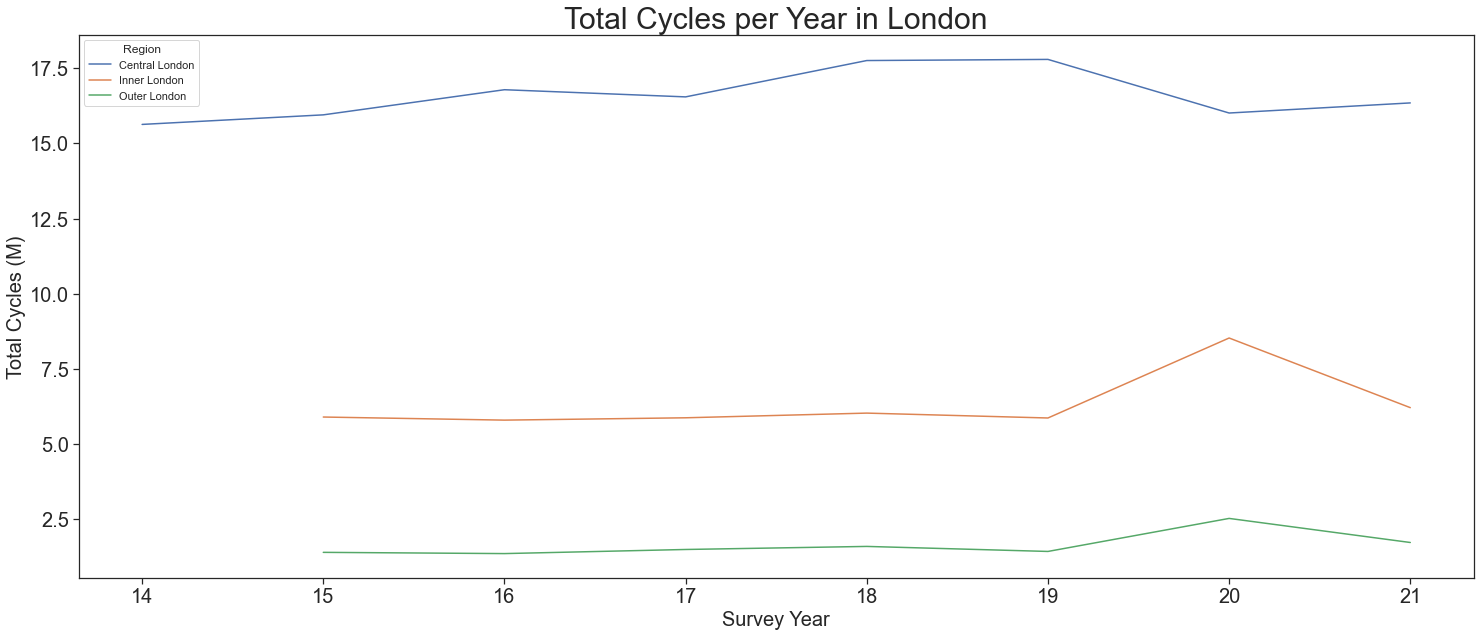

In [103]:
# All London
sns.set(rc = {'figure.figsize':(25,10)}, font_scale = 10)
sns.set_theme(style="ticks")
y = sns.lineplot(data = london_all, x = 'Year', y = 'Total cycles', hue="Region", ci = None)
y.set_title('Total Cycles per Year in London', fontsize = 30)
y.set_xlabel('Survey Year', fontsize = 20)
y.set_ylabel('Total Cycles (M)', fontsize = 20)
plt.tick_params(axis='both', labelsize=20)

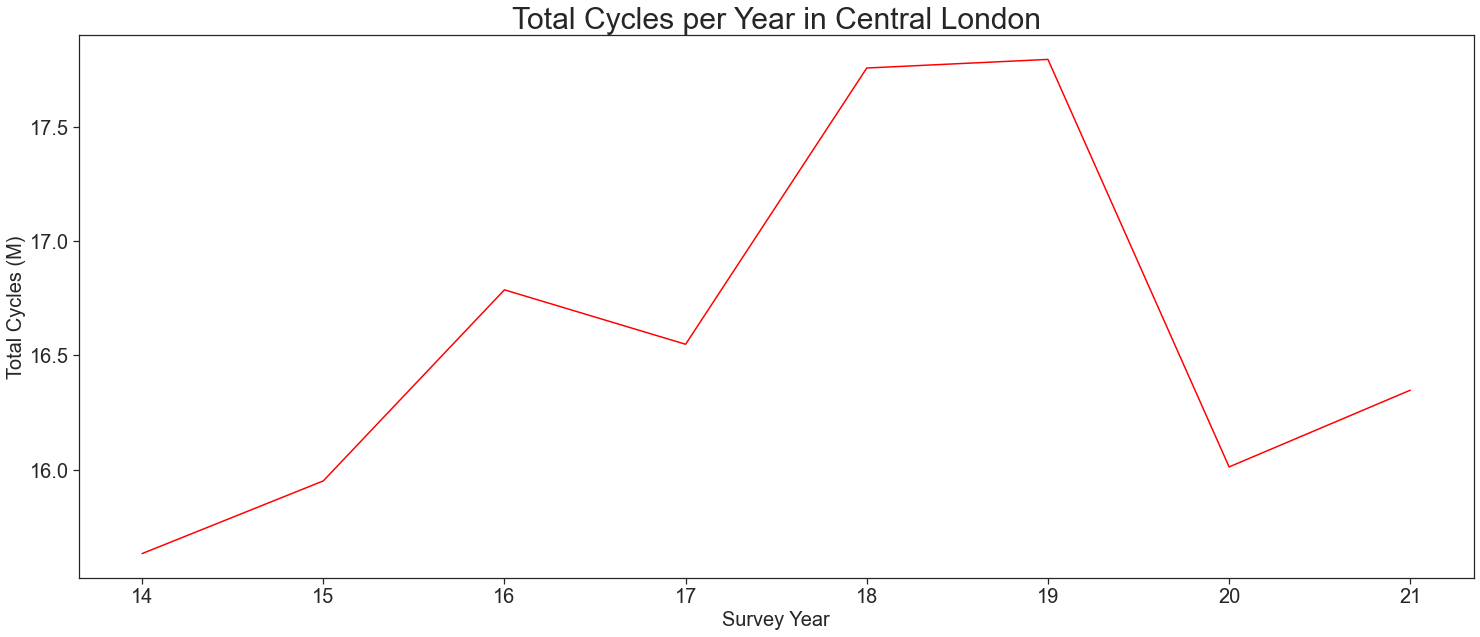

In [111]:
# Plot Central London
sns.set(rc = {'figure.figsize':(25,10)}, font_scale = 10)
sns.set_theme(style="ticks")
y = sns.lineplot(data = central_london_clean, x = 'Year', y = 'Total cycles', color="red", ci = None)
y.set_title('Total Cycles per Year in Central London', fontsize = 30)
y.set_xlabel('Survey Year', fontsize = 20)
y.set_ylabel('Total Cycles (M)', fontsize = 20)
plt.tick_params(axis='both', labelsize=20)

image_format = 'png'
image_name = 'timeseries_central.png'
fig.savefig('C:/Users/mhbil/OneDrive/Desktop/LSE Employer Project/LSE_DA_Employer_Project_2_London/Images/timeseries_central.png', format=image_format, dpi=1200)

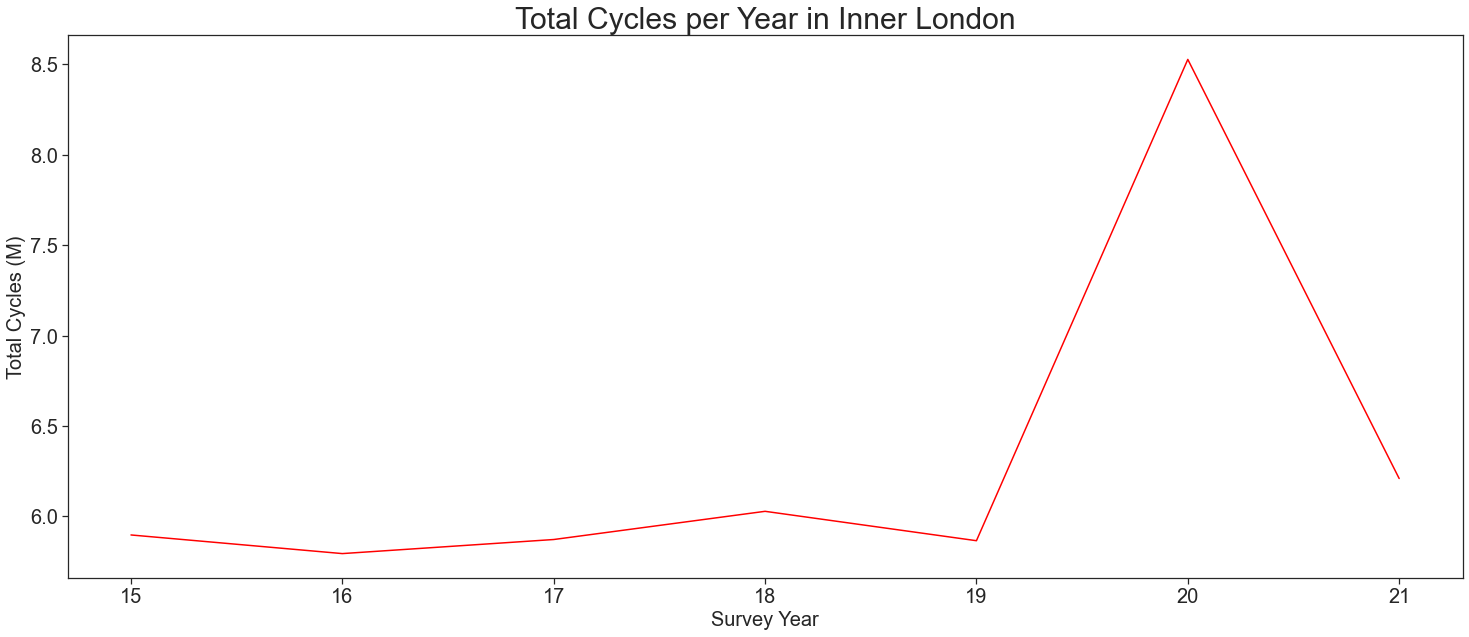

In [93]:
# Plot Inner London
sns.set(rc = {'figure.figsize':(25,10)}, font_scale = 10)
sns.set_theme(style="ticks")
y = sns.lineplot(data = inner_london, x = 'Year', y = 'Total cycles', color = 'red', ci = None)
y.set_title('Total Cycles per Year in Inner London', fontsize = 30)
y.set_xlabel('Survey Year', fontsize = 20)
y.set_ylabel('Total Cycles (M)', fontsize = 20)
plt.tick_params(axis='both', labelsize=20)

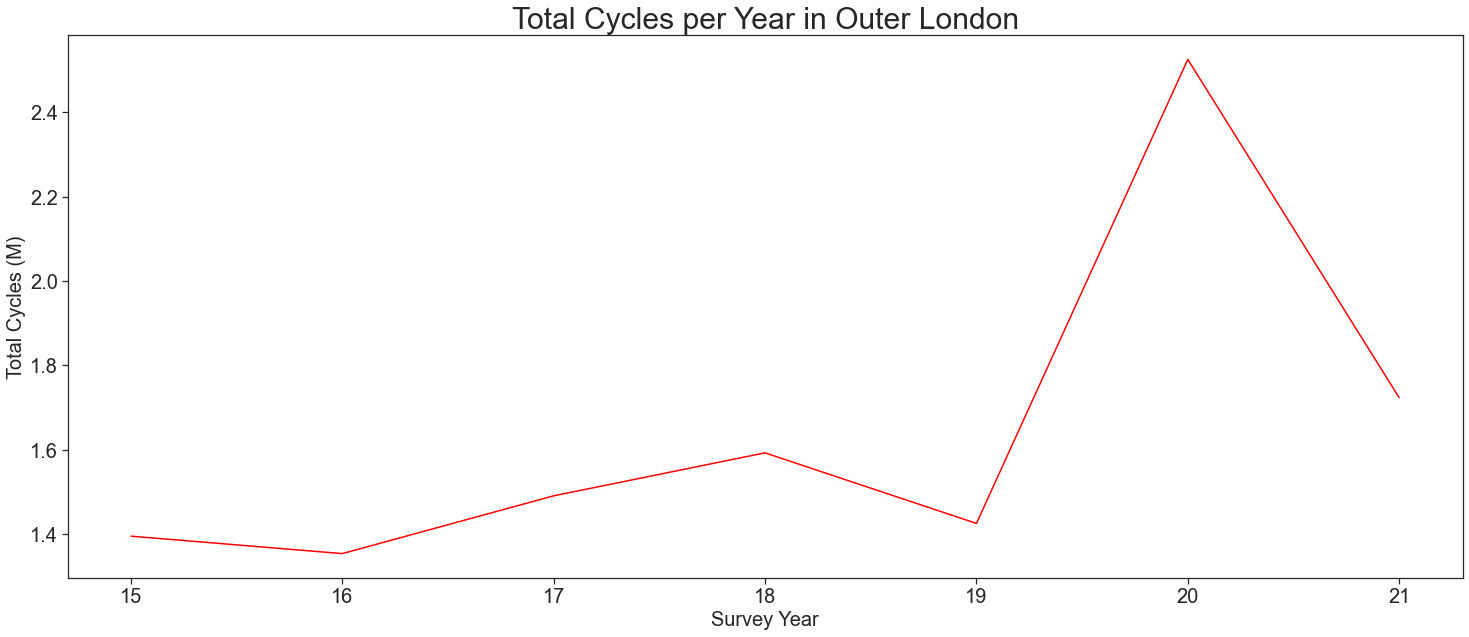

In [94]:
# Outer Londer
sns.set(rc = {'figure.figsize':(25,10)}, font_scale = 10)
sns.set_theme(style="ticks")
y = sns.lineplot(data = outer_london, x = 'Year', y = 'Total cycles', color = 'red', ci = None)
y.set_title('Total Cycles per Year in Outer London', fontsize = 30)
y.set_xlabel('Survey Year', fontsize = 20)
y.set_ylabel('Total Cycles (M)', fontsize = 20)
plt.tick_params(axis='both', labelsize=20)

## Exploratory Data Analysis - Time of Year

### Central London

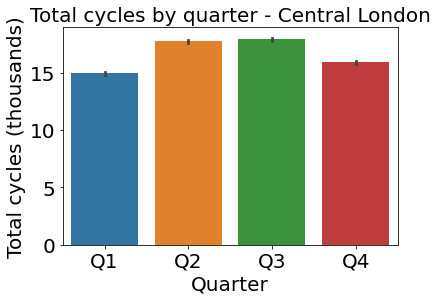

In [47]:
# Plot central London
sns.barplot(x='Quarter', y='Total cycles', data=central_london_clean)
plt.title('Total cycles by quarter - Central London', fontsize=20)
plt.xlabel('Quarter', fontsize=20)
plt.ylabel('Total cycles (thousands)', fontsize=20)
plt.tick_params(axis='both', labelsize=20)

### Inner London

In [48]:
# Subset to remove values of '0'
inner_london_quarter = inner_london[inner_london['Quarter'] != '0']

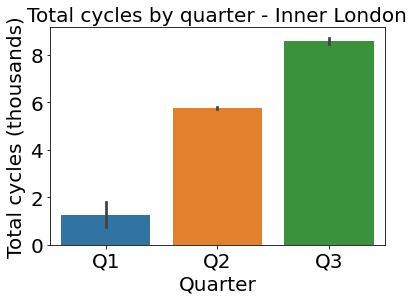

In [49]:
sns.barplot(x='Quarter', y='Total cycles', data=inner_london_quarter, order=['Q1', 'Q2', 'Q3'])
plt.title('Total cycles by quarter - Inner London', fontsize=20)
plt.xlabel('Quarter', fontsize=20)
plt.ylabel('Total cycles (thousands)', fontsize=20)
plt.tick_params(axis='both', labelsize=20)

### Outer London

In [50]:
# Subset to remove values of '0'
outer_london_quarter = outer_london[outer_london['Quarter'] != '0']

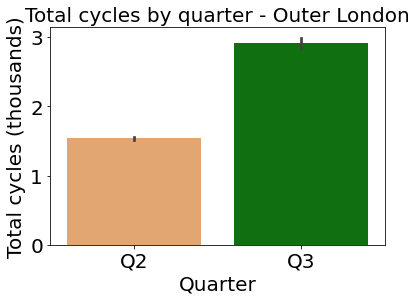

In [51]:
# Plot outer London
sns.barplot(x='Quarter', y='Total cycles', data=outer_london_quarter, palette=["sandybrown", "g"])
plt.title('Total cycles by quarter - Outer London', fontsize=20)
plt.xlabel('Quarter', fontsize=20)
plt.ylabel('Total cycles (thousands)', fontsize=20)
plt.tick_params(axis='both', labelsize=20)

### Aggregate

In [52]:
# Subset to remove values of '0'
london_all_quarter = london_all[london_all['Quarter'] != '0']

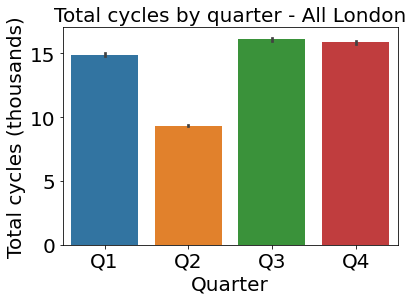

In [53]:
# Plot all London
sns.barplot(x='Quarter', y='Total cycles', data=london_all_quarter)
plt.title('Total cycles by quarter - All London', fontsize=20)
plt.xlabel('Quarter', fontsize=20)
plt.ylabel('Total cycles (thousands)', fontsize=20)
plt.tick_params(axis='both', labelsize=20)

## Exploratory Data Analysis - Time of Day

### Central London

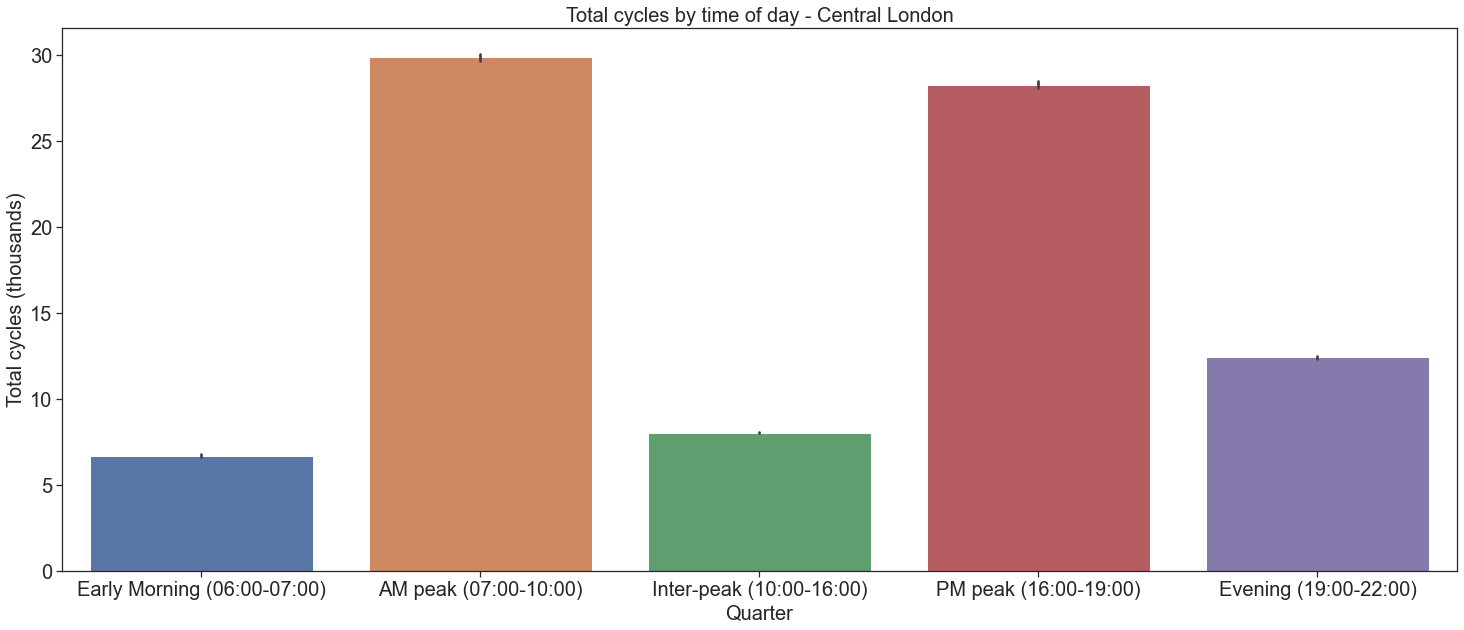

In [105]:
# Plot
sns.barplot(x='Period', y='Total cycles', data=central_london_clean)
plt.title('Total cycles by time of day - Central London', fontsize=20)
plt.xlabel('Quarter', fontsize=20)
plt.ylabel('Total cycles (thousands)', fontsize=20)
plt.tick_params(axis='both', labelsize=20)

### Inner London

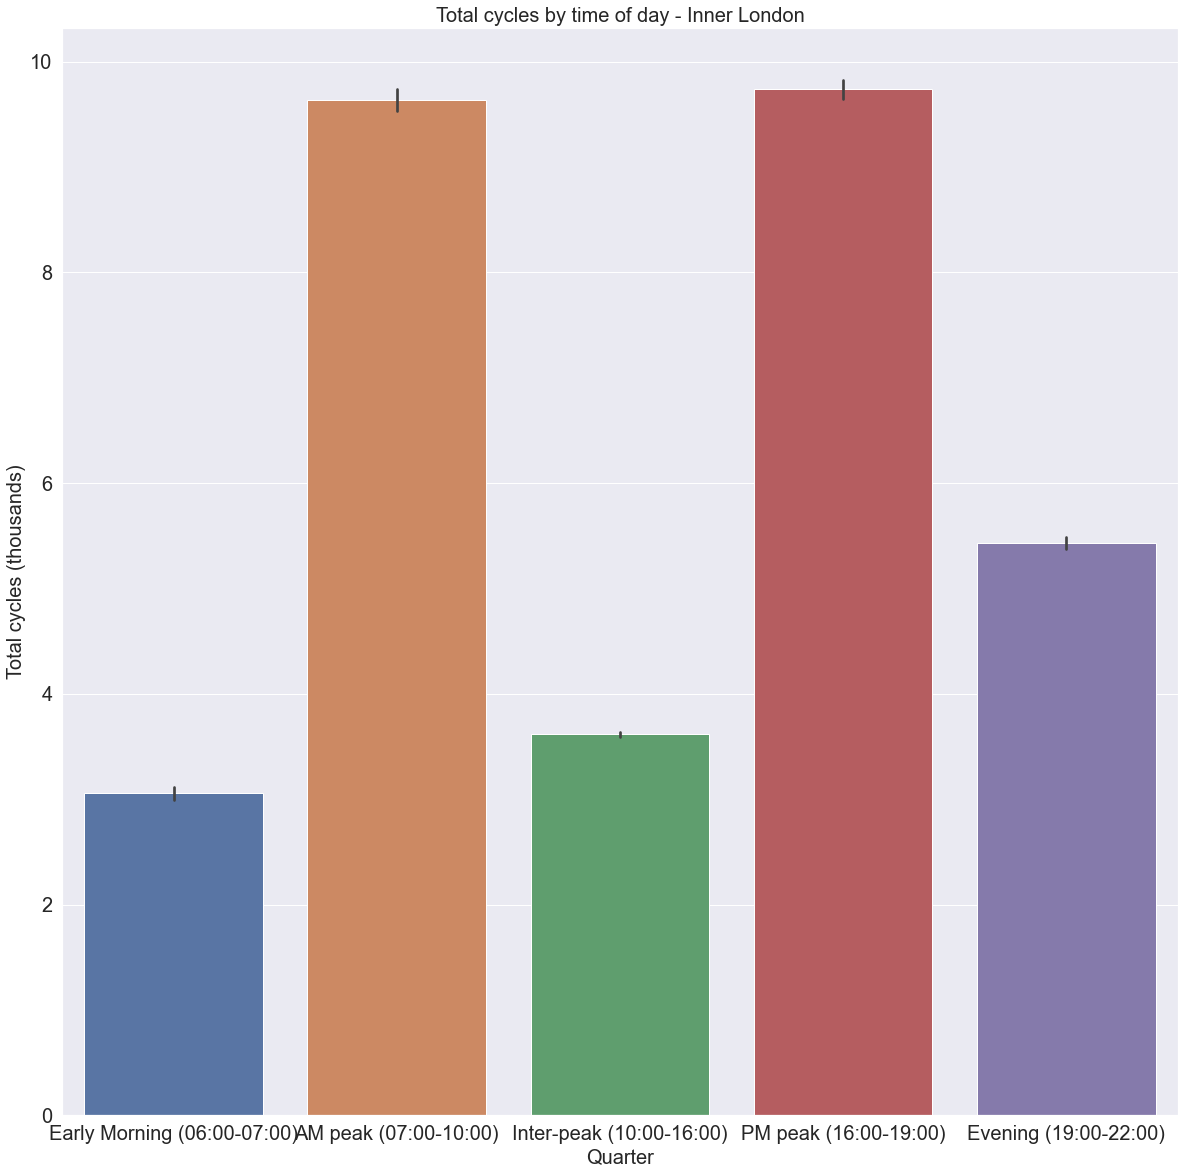

In [75]:
# Plot
sns.barplot(x='Period', y='Total cycles', data=inner_london_renamecols)
plt.title('Total cycles by time of day - Inner London', fontsize=20)
plt.xlabel('Quarter', fontsize=20)
plt.ylabel('Total cycles (thousands)', fontsize=20)
plt.tick_params(axis='both', labelsize=20)

### Outer London

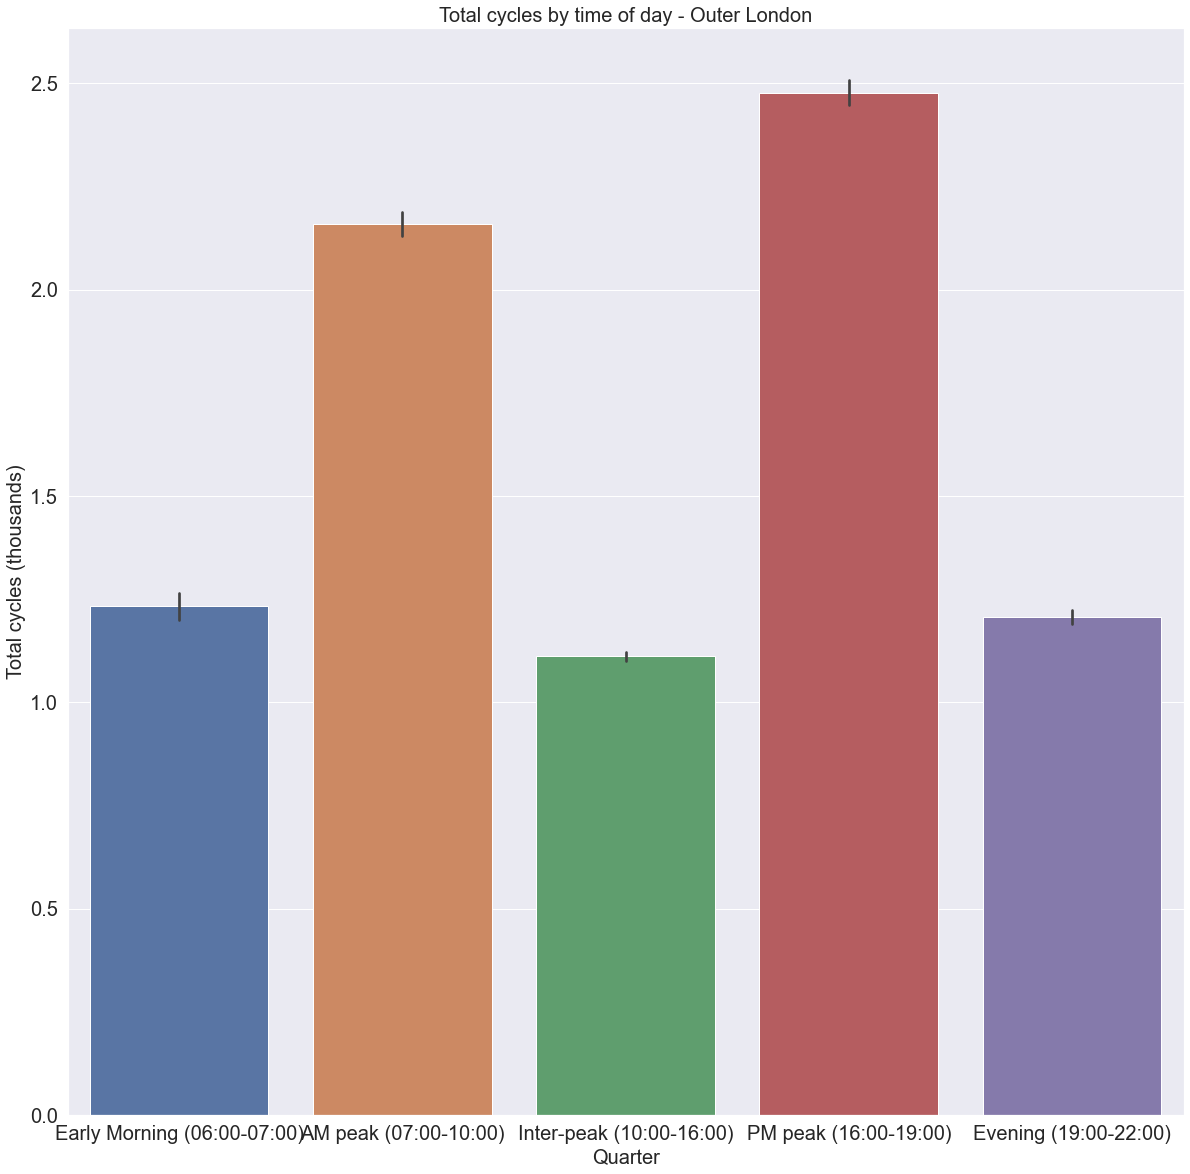

In [77]:
sns.barplot(x='Period', y='Total cycles', data=outer_london).set(title="Total cycles and time of day - Outer London")
plt.title('Total cycles by time of day - Outer London', fontsize=20)
plt.xlabel('Quarter', fontsize=20)
plt.ylabel('Total cycles (thousands)', fontsize=20)
plt.tick_params(axis='both', labelsize=20)

### Aggregate

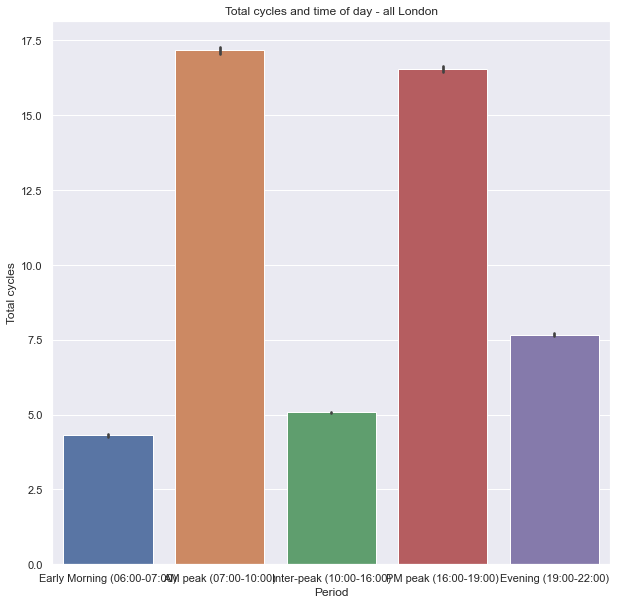

In [59]:
sns.barplot(x='Period', y='Total cycles', data=london_all).set(title="Total cycles and time of day - all London")
sns.set(rc={'figure.figsize':(15, 15)})

## Exploratory Data Analysis - Weather

### Central London

In [60]:
# Subset data based on top weather conditions
central_london_topweather = central_london_clean.groupby('Weather').filter(lambda x : len(x) > 1000)

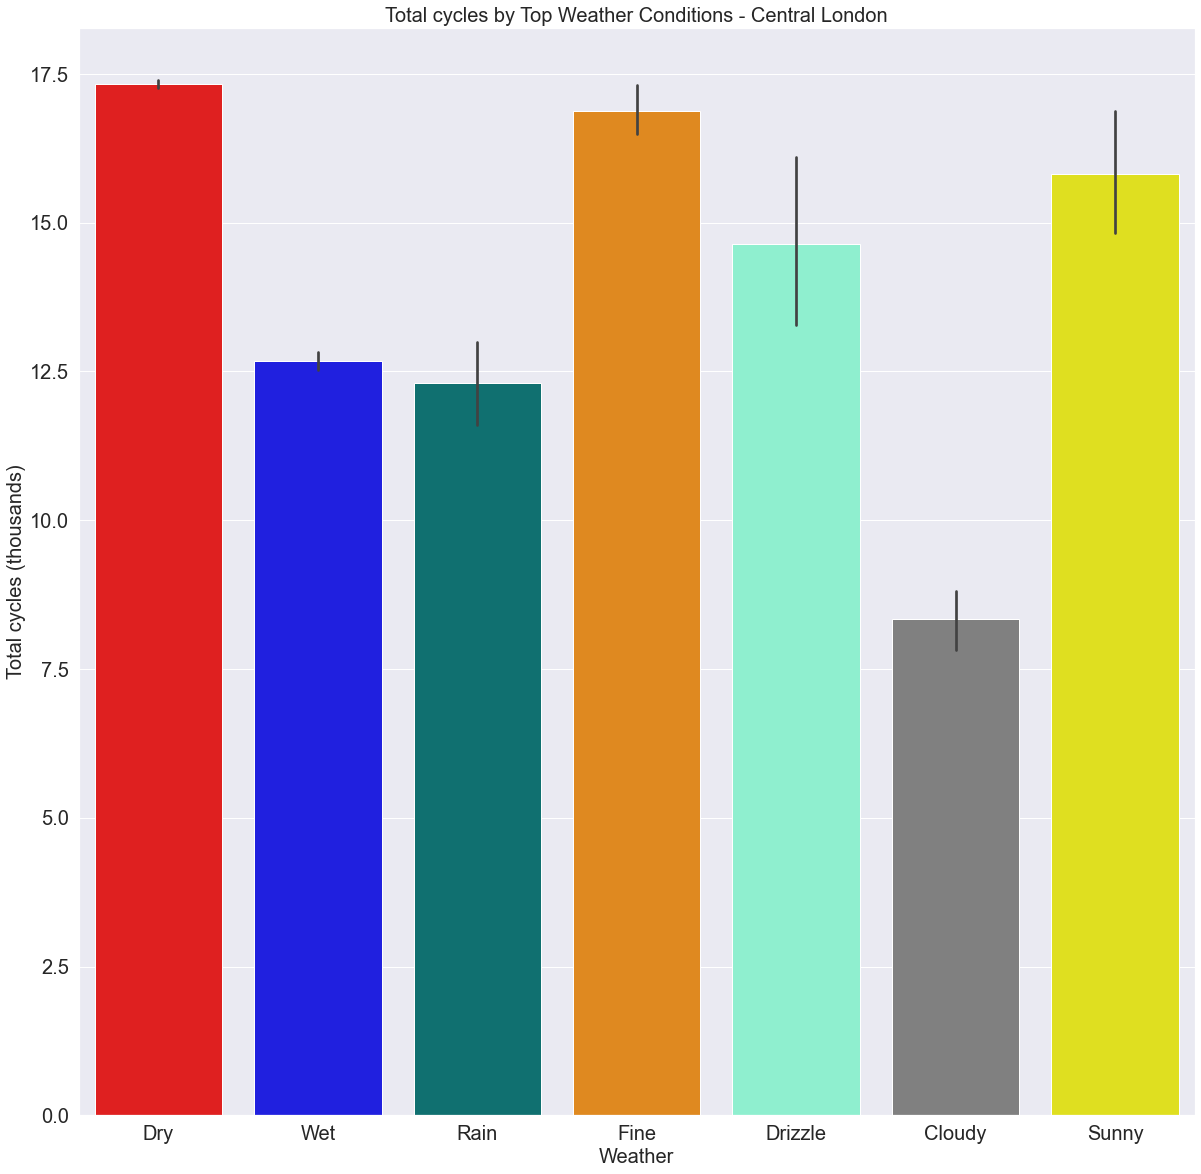

In [81]:
# Examine relationship between total cycles and top weather conditions
sns.barplot(x='Weather', y='Total cycles', data=central_london_topweather, palette = ["red", "blue", "teal", "darkorange", "aquamarine", "grey", "yellow"])
plt.title('Total cycles by Top Weather Conditions - Central London', fontsize=20)
plt.xlabel('Weather', fontsize=20)
plt.ylabel('Total cycles (thousands)', fontsize=20)
plt.tick_params(axis='both', labelsize=20)

### Inner London

In [62]:
# Subset data based on top weather conditions
inner_london_topweather = inner_london.groupby('Weather').filter(lambda x : len(x) > 1000)

In [63]:
# Drop N/a value
inner_london_topweather = inner_london_topweather[inner_london_topweather['Weather'] != "N/a"]

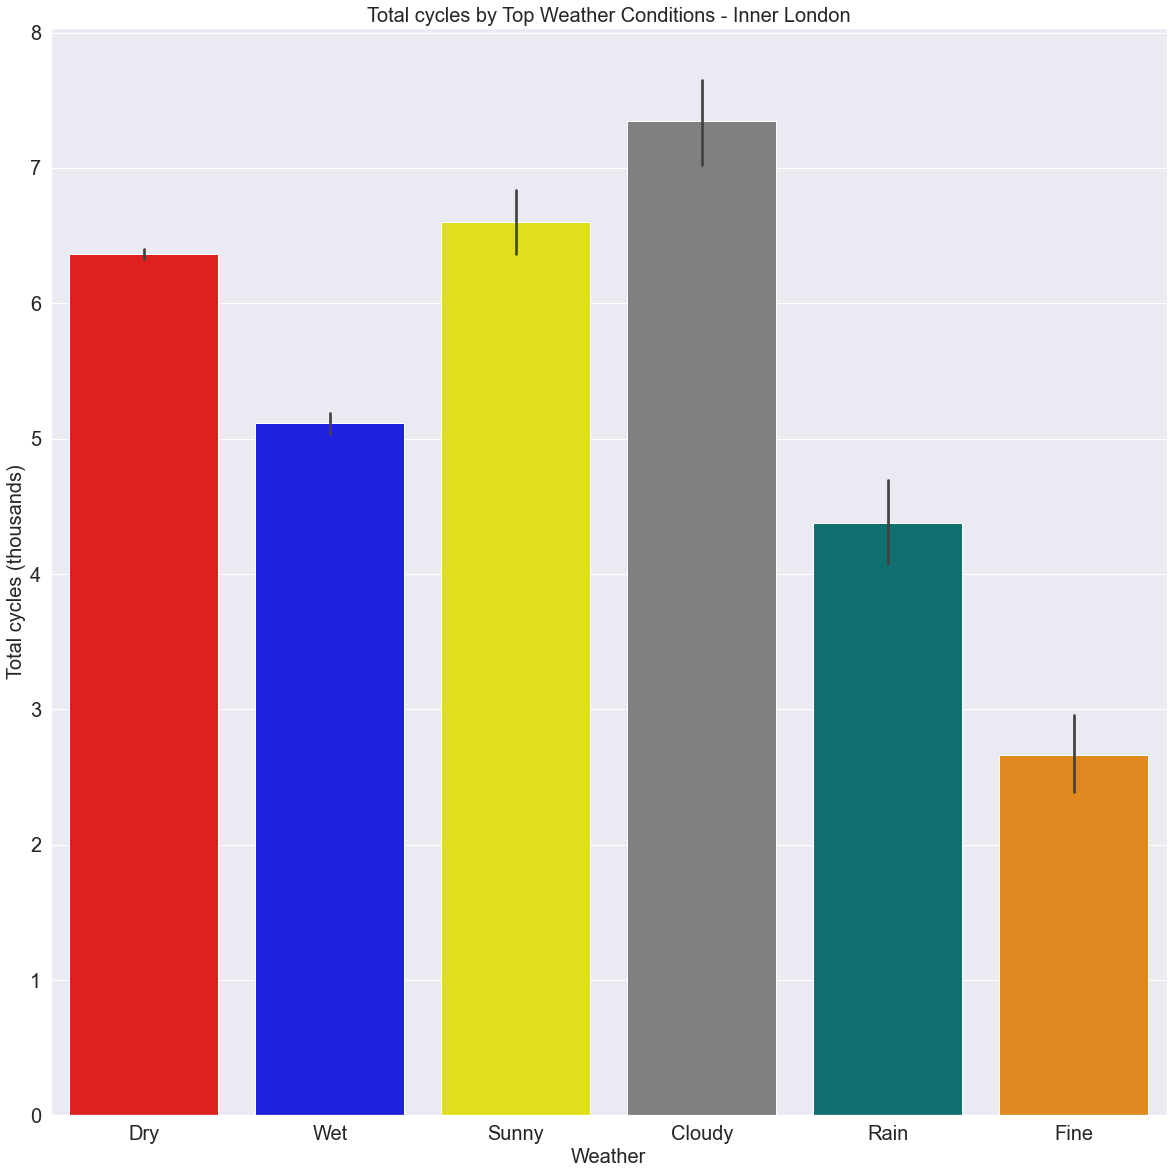

In [82]:
# Examine relationship between total cycles and top weather conditions
sns.barplot(x='Weather', y='Total cycles', data=inner_london_topweather, palette=["red", "blue", "yellow", "grey", "teal", "darkorange"])
plt.title('Total cycles by Top Weather Conditions - Inner London', fontsize=20)
plt.xlabel('Weather', fontsize=20)
plt.ylabel('Total cycles (thousands)', fontsize=20)
plt.tick_params(axis='both', labelsize=20)

### Outer London

In [65]:
# Subset data based on top weather conditions
outer_london_topweather = outer_london.groupby('Weather').filter(lambda x : len(x) > 1000)

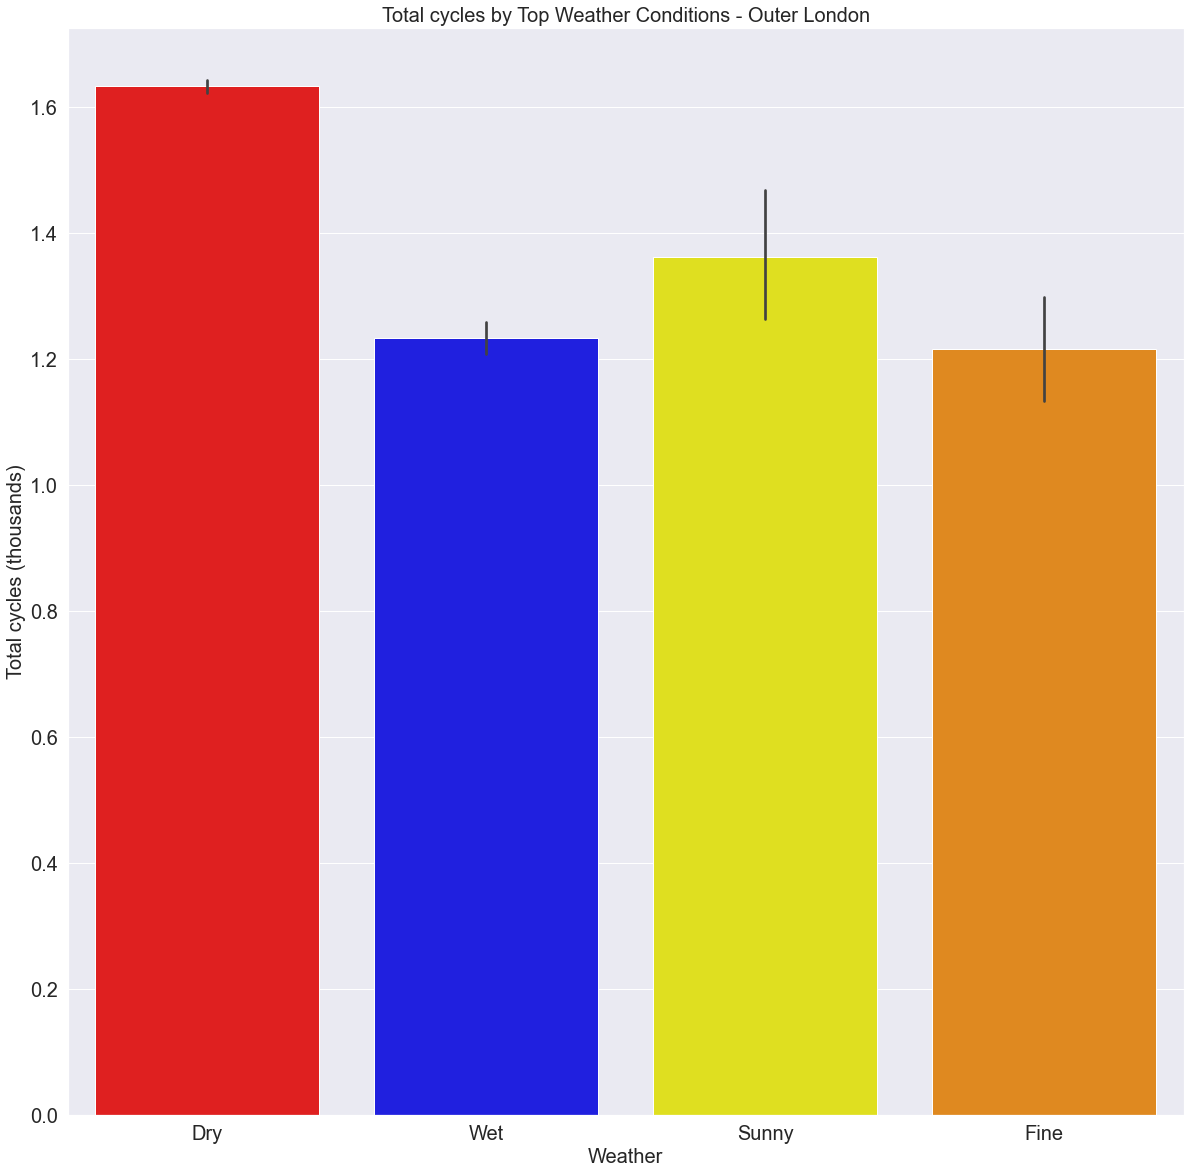

In [83]:
# Examine relationship between total cycles and top weather conditions
sns.barplot(x='Weather', y='Total cycles', data=outer_london_topweather, palette=["red", "blue", "yellow", "darkorange"])
plt.title('Total cycles by Top Weather Conditions - Outer London', fontsize=20)
plt.xlabel('Weather', fontsize=20)
plt.ylabel('Total cycles (thousands)', fontsize=20)
plt.tick_params(axis='both', labelsize=20)

### Aggregate

In [67]:
# Subset data based on top weather conditions
all_london_topweather = london_all.groupby('Weather').filter(lambda x : len(x) > 1000)

[Text(0.5, 1.0, 'Total cycles by Top Weather Conditions - all London')]

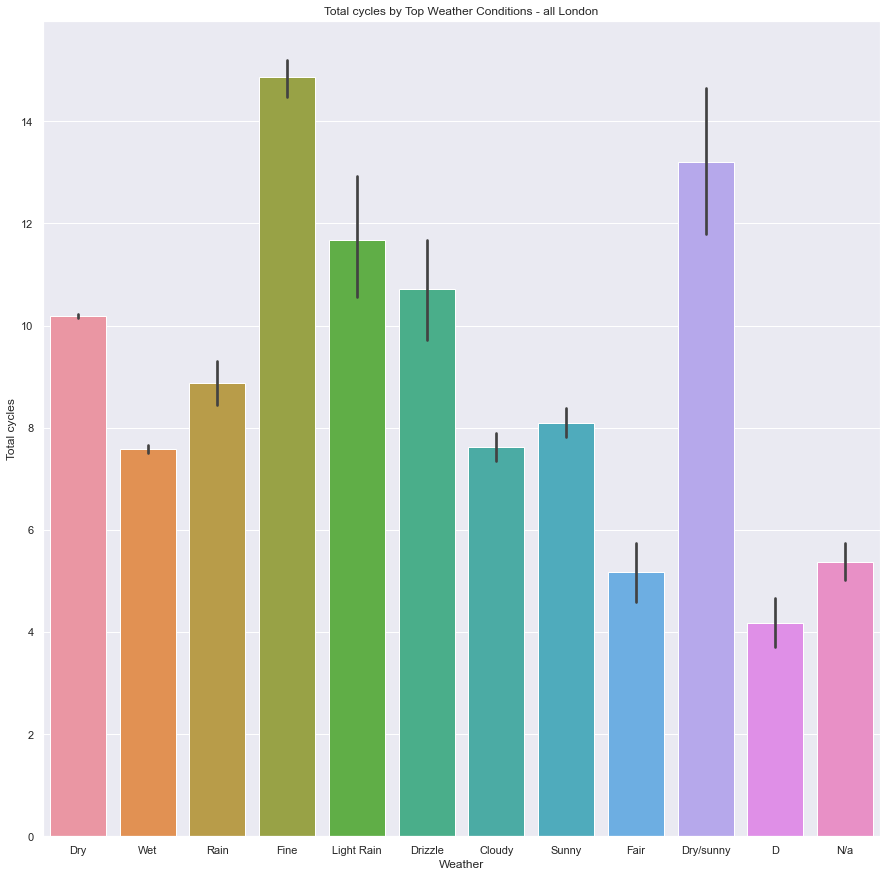

In [68]:
# Examine relationship between total cycles and top weather conditions
sns.barplot(x='Weather', y='Total cycles', data=all_london_topweather).set(title="Total cycles by Top Weather Conditions - all London")

## Exploratory Data Analysis - Direction of travel

### Outer London

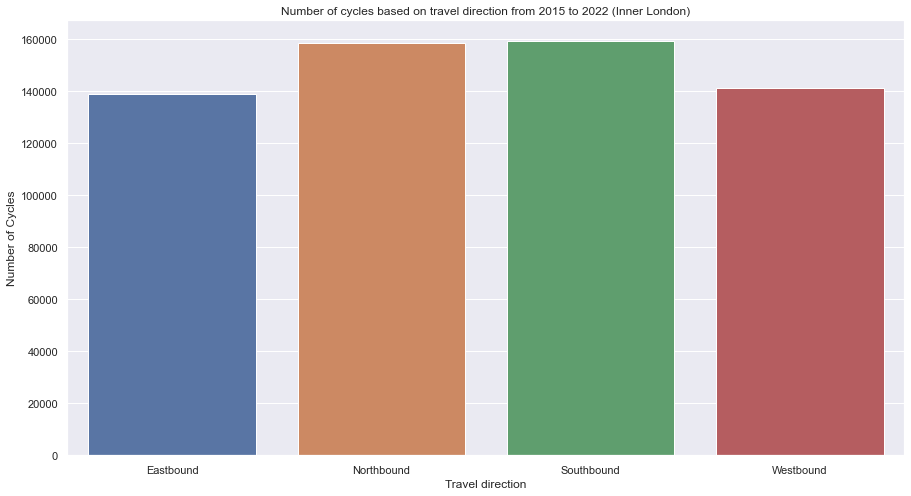

In [85]:
# Visualise relationhip between number of cyclists and direction of travel.
outer_london_direction = outer_london.groupby(['Direction']).sum().reset_index()

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.barplot(data = outer_london_direction, x = 'Direction', y = 'Total cycles')\
.set(title = 'Number of cycles based on travel direction from 2015 to 2022 (Inner London)', xlabel = 'Travel direction',
     ylabel = 'Number of Cycles')
plt.ticklabel_format(style='plain', axis='y')